In [1]:
using DifferentialEquations, Plots

g = 9.79 # Gravitational constants
L = 1.00 # Length of the pendulum

#Initial Conditions
u₀ = [0, π / 60] # Initial speed and initial angle
tspan = (0.0, 6.3) # time domain

#Define the problem
function simplependulum(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*θ
end

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 51-element Array{Float64,1}:
 0.0                 
 0.031087055826046293
 0.08561410455758335 
 0.15017614691650324 
 0.22844999436654792 
 0.31505858231866835 
 0.4095255075418717  
 0.5094804430063147  
 0.6142606578277134  
 0.72338143341672    
 ⋮                   
 5.276991325356822   
 5.427395817422836   
 5.568207787381734   
 5.706096558149855   
 5.841862325393668   
 5.978574228631899   
 6.118893740946424   
 6.267408663728185   
 6.3                 
u: 51-element Array{Array{Float64,1},1}:
 [0.0, 0.05235987755982988]                    
 [0.001625148987962308, 0.05211238162371752]   
 [0.004429323578461453, 0.05049245161124966]   
 [0.0075770260536344655, 0.04668511432388565]  
 [0.010968721741242842, 0.039543569080504874]  
 [0.013951484314397536, 0.028913538959919036]  
 [0.01603824097656431, 0.014943965751857403]   
 [0.016729739945624947, -0.0012207095821331476]
 [0.01571305163151334, -0.01

Analytic solution

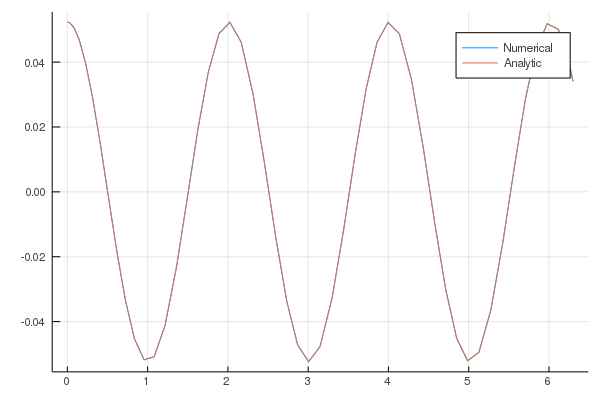

In [2]:
u = u₀[2] .* cos.(sqrt(g / L) .* sol.t)

plot(sol.t, getindex.(sol.u, 2), label = "Numerical")
plot!(sol.t, u, label = "Analytic")

[Numbers with Uncertainties](http://tutorials.juliadiffeq.org/html/type_handling/02-uncertainties.html)

In [3]:
using Measurements

g = 9.79 ± 0.02; # Gravitational constants
L = 1.00 ± 0.01; # Length of the pendulum

#Initial Conditions
u₀ = [0 ± 0, π / 60 ± 0.01] # Initial speed and initial angle

#Define the problem
function simplependulum(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*θ
end

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-6);
nothing # hide

Analytic solution

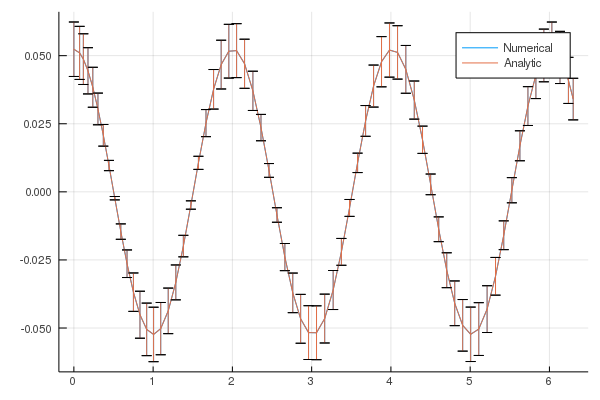

In [4]:
u = u₀[2] .* cos.(sqrt(g / L) .* sol.t)

plot(sol.t, getindex.(sol.u, 2), label = "Numerical")
plot!(sol.t, u, label = "Analytic")

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*